In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/Untitled Folder/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.shape

(9994, 13)

In [ ]:
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.duplicated().sum()

17

In [ ]:
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data = data.drop(['Postal Code'], axis=1)
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


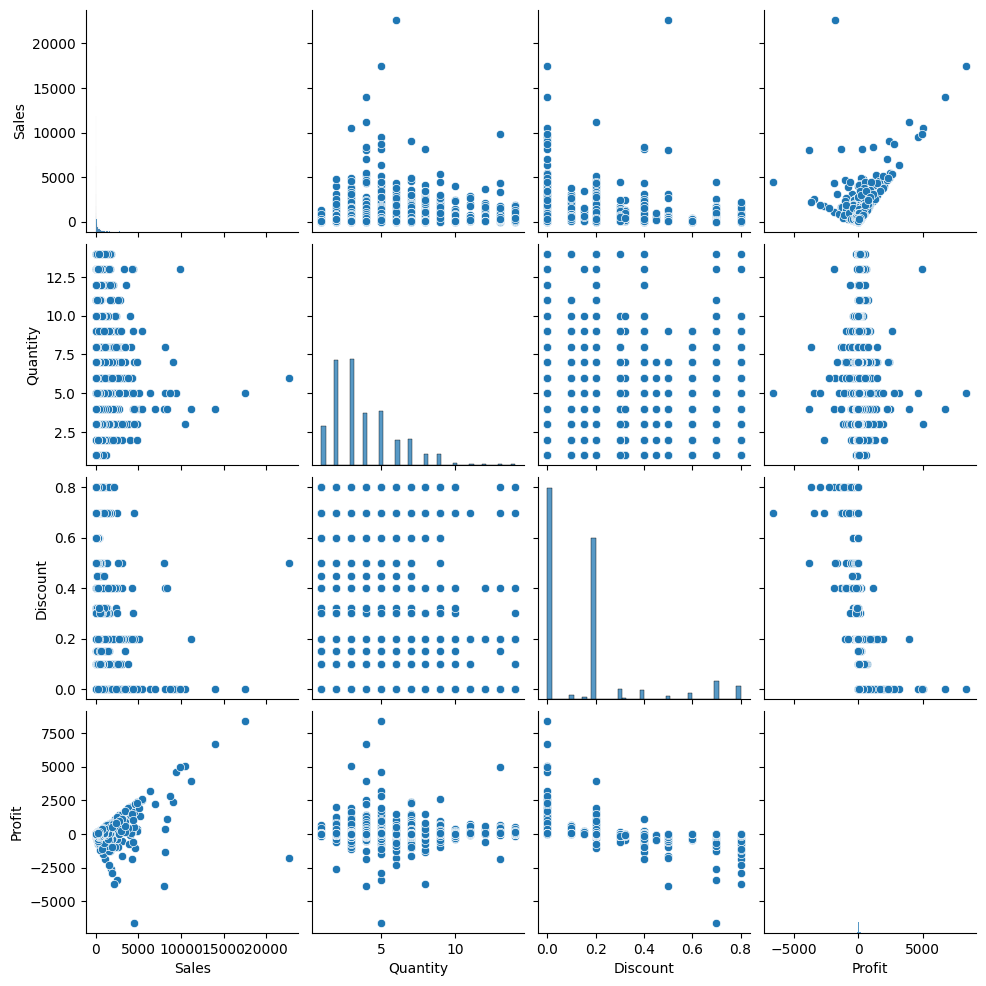

In [ ]:
Rsns.pairplot(data)

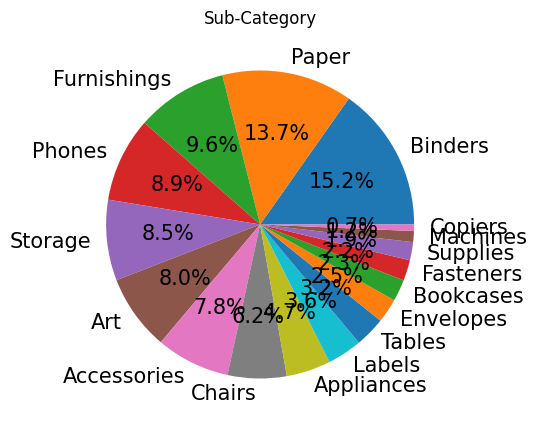

In [ ]:
plt.figure(figsize=(10,5))
textprops = {'fontsize':15}
plt.title('Sub-Category')
plt.pie(data['Sub-Category'].value_counts(), labels=data['Sub-Category'].value_counts().index,autopct='%1.1f%%',textprops=textprops)
plt.show()


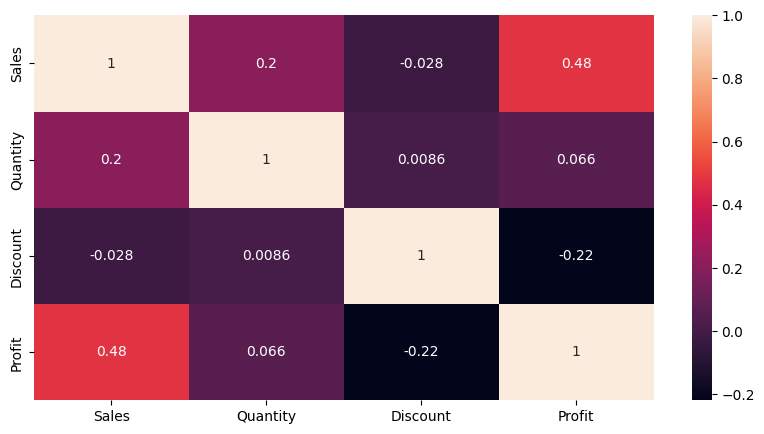

In [ ]:
# Convert categorical columns to numerical representations if needed
data_encoded = pd.get_dummies(data, columns=['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Country'])  # Added 'Country' to the list of columns to encode

# Drop non-numerical columns that might remain after encoding
data_encoded = data_encoded.select_dtypes(include=['number']) # Select only numerical columns

# Calculate correlation matrix on the encoded data
data_encoded.corr()

# Proceed with the heatmap visualization
plt.figure(figsize=(10,5))
sns.heatmap(data_encoded.corr(), annot=True)
plt.show()

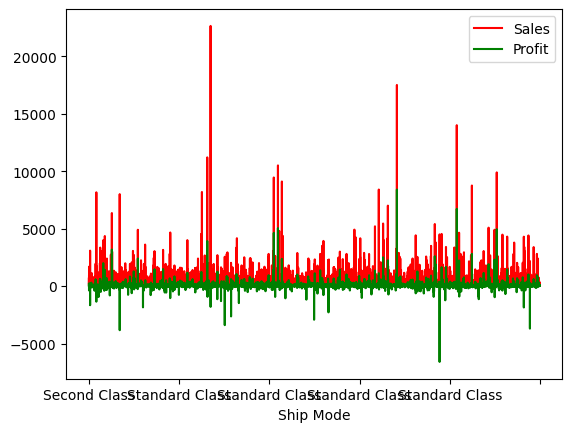

In [ ]:
# prompt: line graph different color

data.plot.line(x="Ship Mode", y=["Sales", "Profit"], color=["red", "green"])
plt.show()


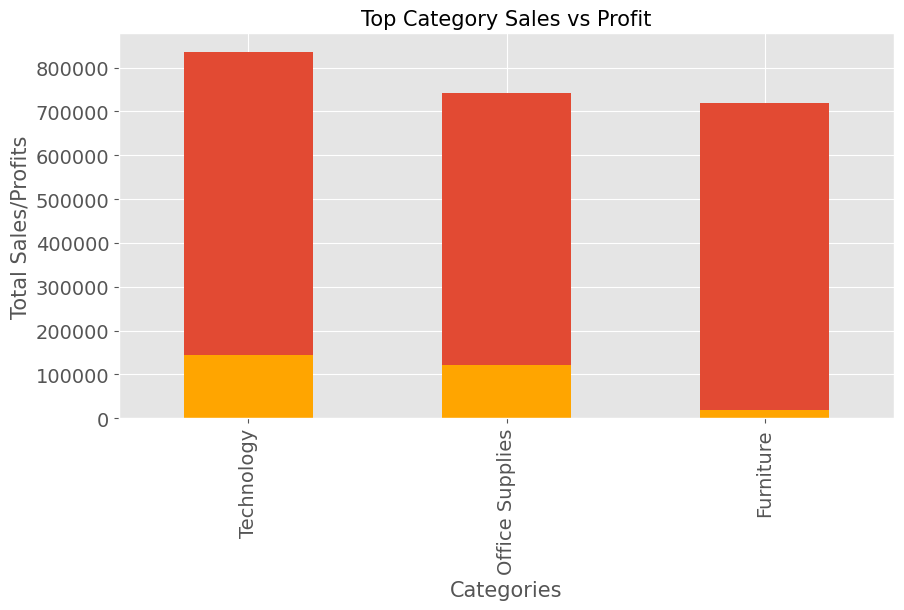

In [ ]:
top_categories_S = data.groupby('Category').Sales.sum().nlargest(n=100)
top_categories_P = data.groupby('Category').Profit.sum().nlargest(n=100)
plt.style.use('ggplot')
top_categories_S.plot(kind='bar',figsize=(10,5),fontsize=14)
top_categories_P.plot(kind='bar',figsize=(10,5),fontsize=14,color='orange')
plt.xlabel('Categories',fontsize=15)
plt.ylabel('Total Sales/Profits',fontsize=15)
plt.title("Top Category Sales vs Profit",fontsize=15)
plt.show()

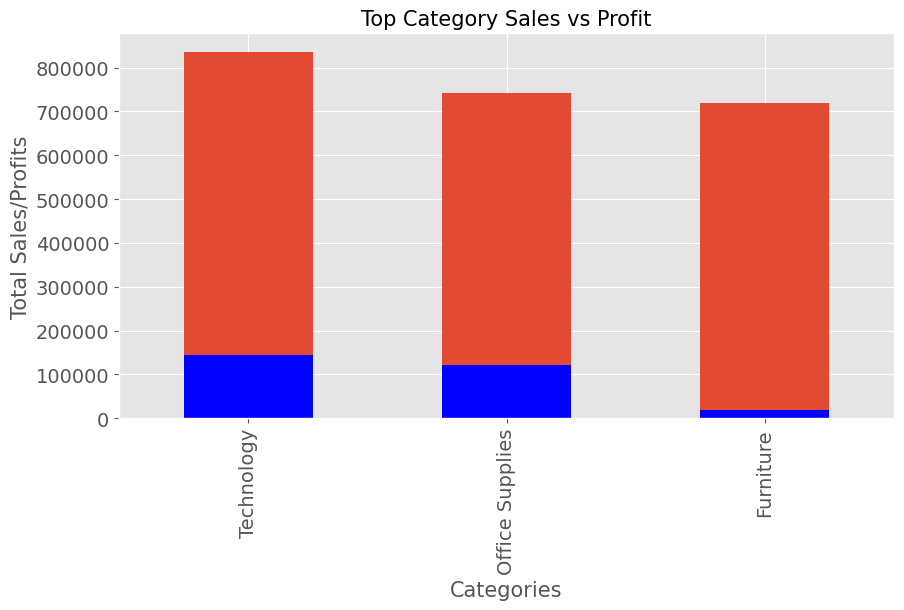

In [ ]:
top_categories_S = data.groupby('Category').Sales.sum().nlargest(n=100)
top_categories_P = data.groupby('Category').Profit.sum().nlargest(n=100)
plt.style.use('ggplot')
top_categories_S.plot(kind='bar',figsize=(10,5),fontsize=14)
top_categories_P.plot(kind='bar',figsize=(10,5),fontsize=14,color='blue')
plt.xlabel('Categories',fontsize=15)
plt.ylabel('Total Sales/Profits',fontsize=15)
plt.title("Top Category Sales vs Profit",fontsize=15)
plt.show()

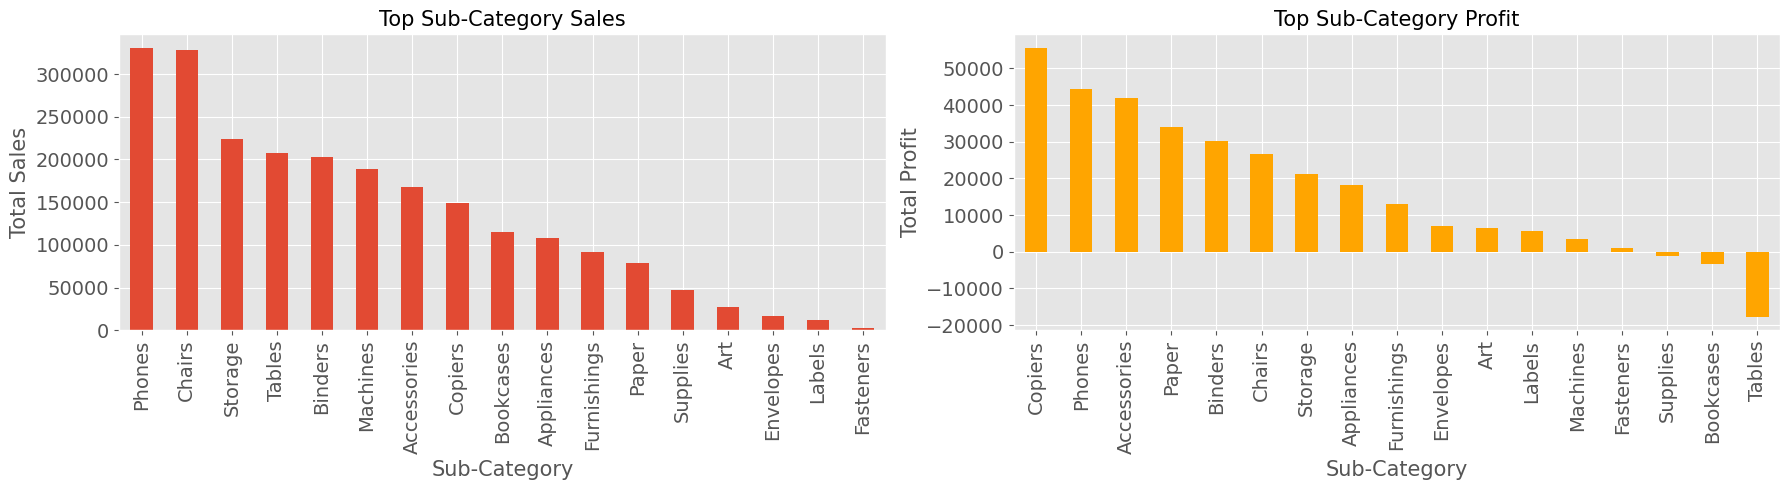

In [38]:
top_subcategories_S = data.groupby('Sub-Category').Sales.sum().nlargest(n=100)
top_subcategories_P = data.groupby('Sub-Category').Profit.sum().nlargest(n=100)

plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

top_subcategories_S.plot(kind='bar', ax=axes[0], fontsize=14)
axes[0].set_title("Top Sub-Category Sales", fontsize=15)
axes[0].set_xlabel('Sub-Category', fontsize=15)
axes[0].set_ylabel('Total Sales', fontsize=15)

top_subcategories_P.plot(kind='bar', ax=axes[1], fontsize=14, color='orange')
axes[1].set_title("Top Sub-Category Profit", fontsize=15)
axes[1].set_xlabel('Sub-Category', fontsize=15)
axes[1].set_ylabel('Total Profit', fontsize=15)

plt.tight_layout()
plt.show()


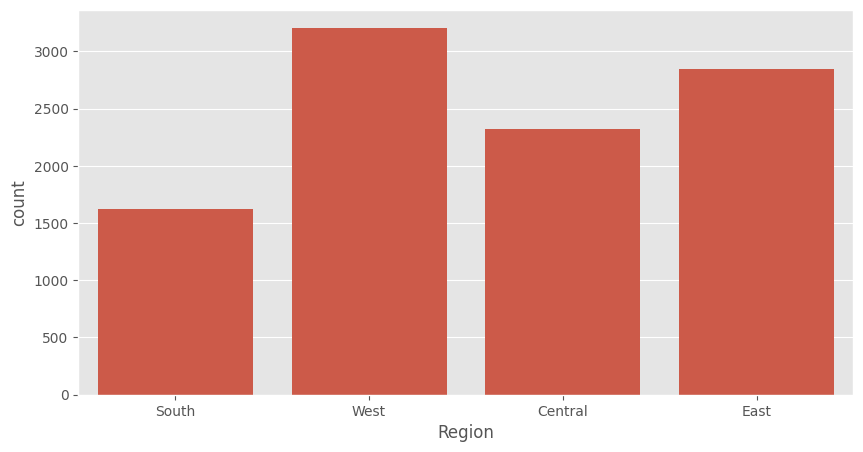

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='Region', data=data)
plt.show()

In [41]:
from os import stat
plt.figure(figsize=(10,5))
statewise_sales = data.groupby(['State']).Sales.sum().sort_values(ascending=False).to_frame()
statewise_sales.head()

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140


<Figure size 1000x500 with 0 Axes>

from matplotlib import pyplot as plt
_df_0['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

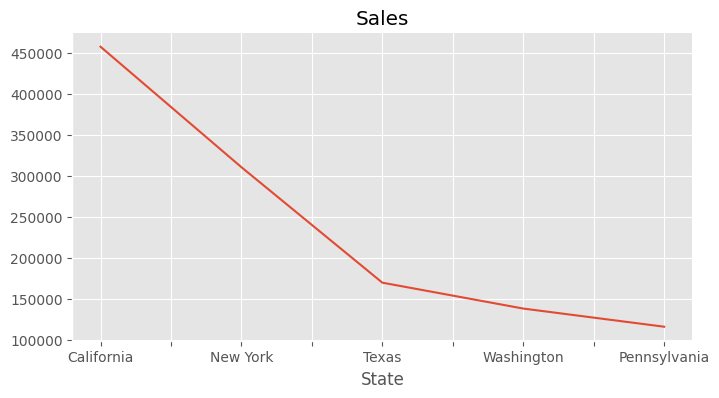

In [43]:
from matplotlib import pyplot as plt
_df_1['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

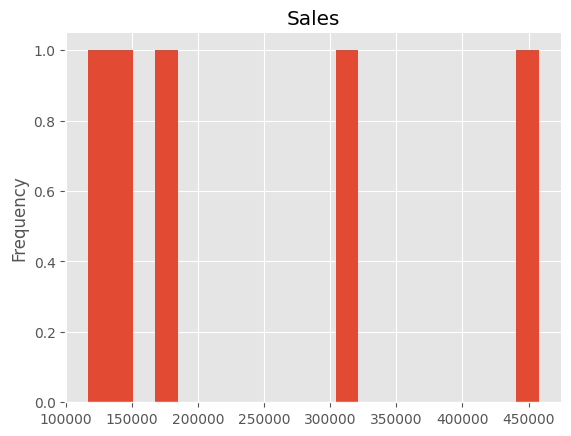

In [42]:
from matplotlib import pyplot as plt
_df_0['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

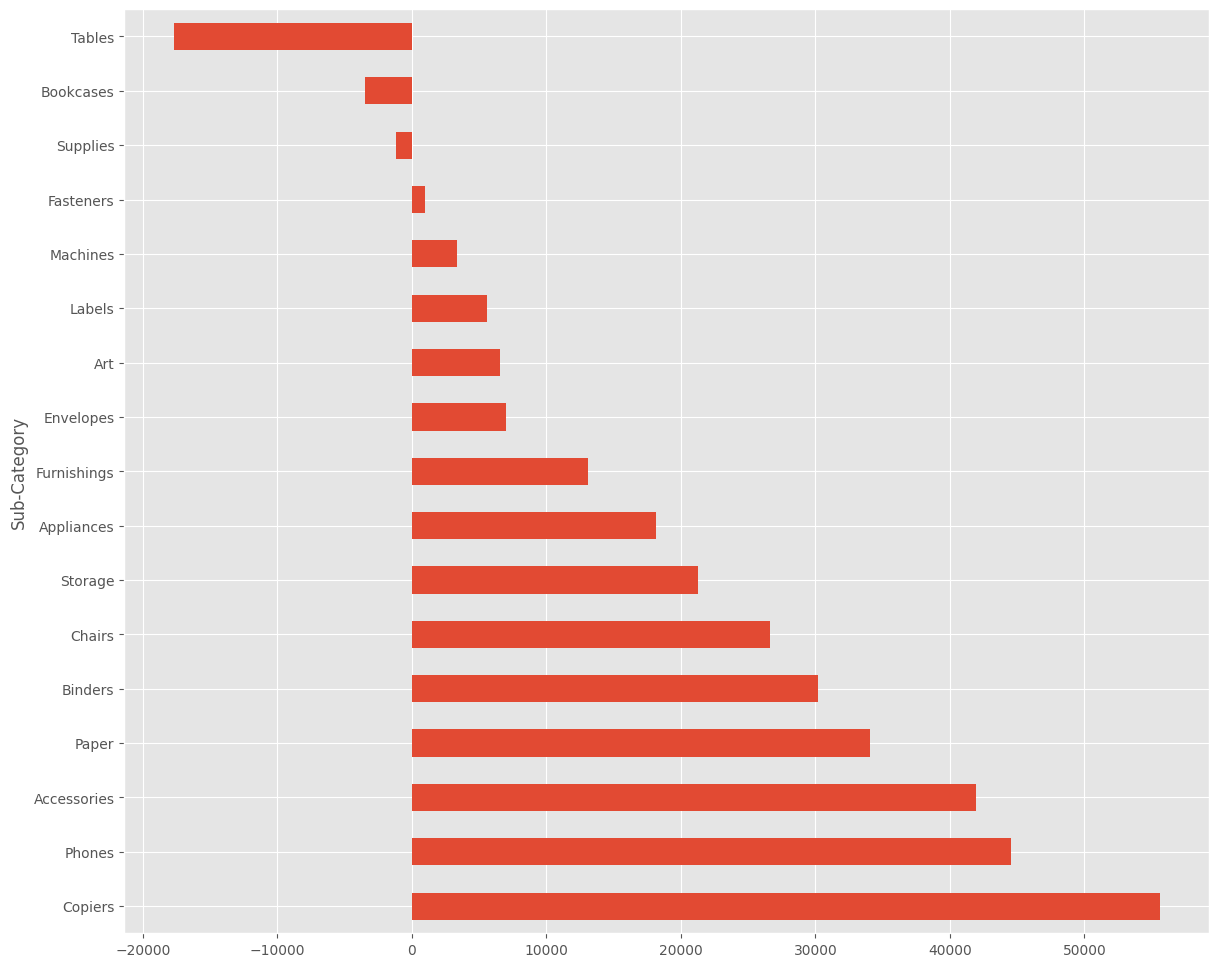

In [50]:
plt.figure(figsize=(14,12))
# Check for typos! The column might be 'Sub-Category'
statewise = data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()
plt.show()

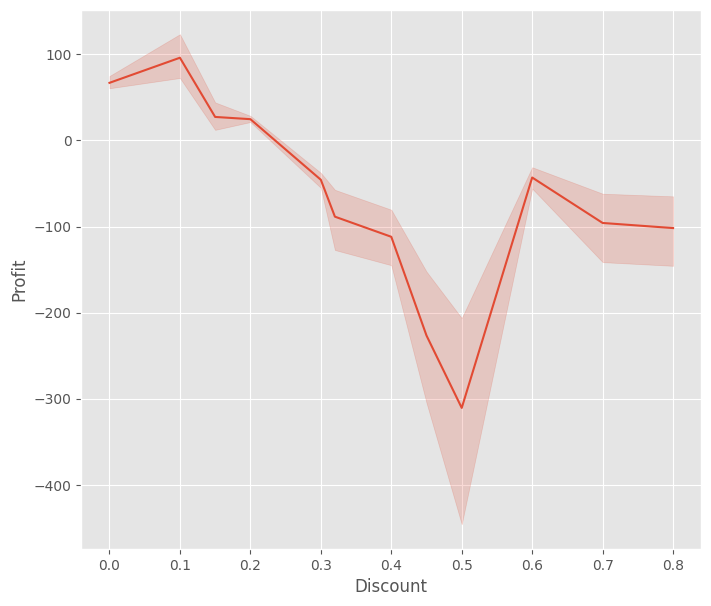

In [51]:
plt.figure(figsize=(8,7))
sns.lineplot(x='Discount', y='Profit', data=data)
plt.show()

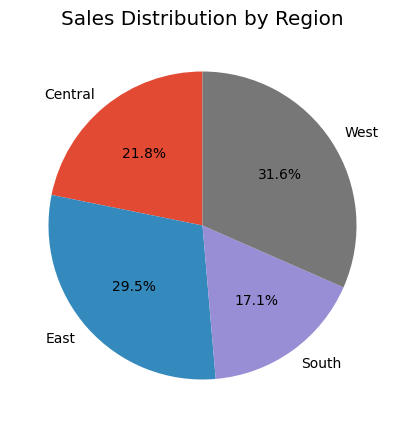

In [52]:
# Calculate the sum of sales for each region
region_sales = data.groupby('Region')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(10, 5))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.show()


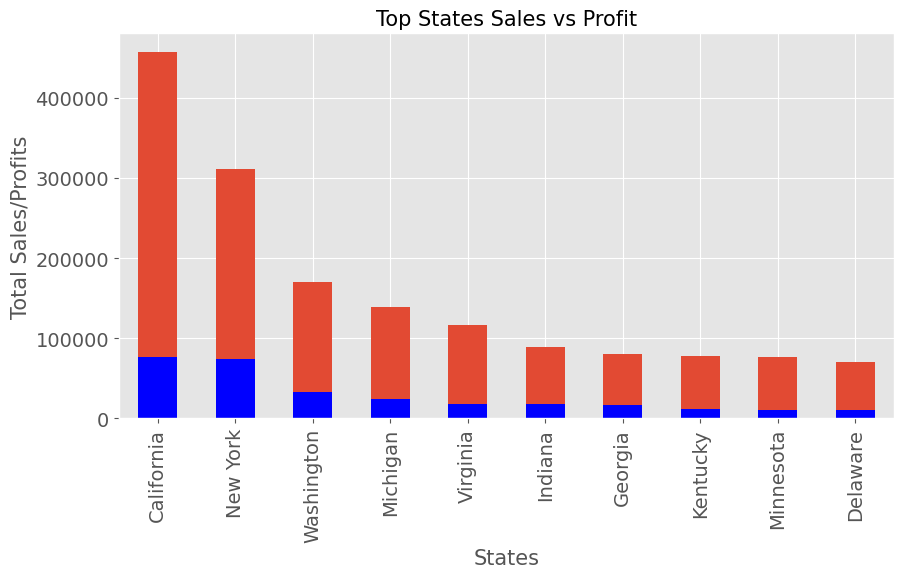

In [56]:
top_states_s = data.groupby('State').Sales.sum().nlargest(n=10)
top_stats_p = data.groupby('State').Profit.sum().nlargest(n=10)
plt.style.use('ggplot')
top_states_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_stats_p.plot(kind='bar',figsize=(10,5),fontsize=14,color='blue')
plt.xlabel('States',fontsize=15)
plt.ylabel('Total Sales/Profits',fontsize=15)
plt.title("Top States Sales vs Profit",fontsize=15)
plt.show()

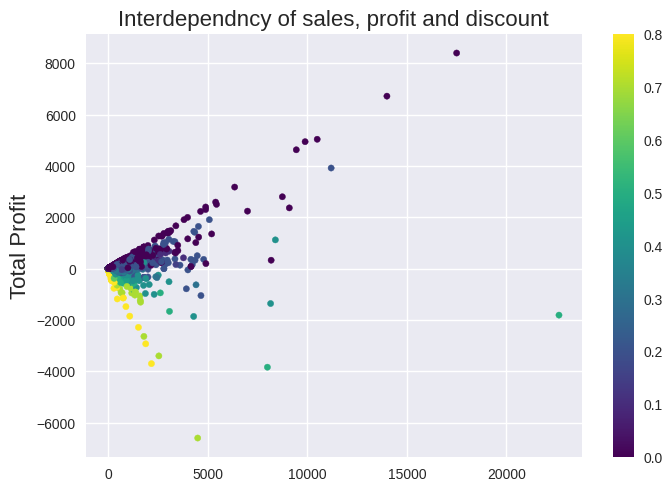

In [61]:
!pip install matplotlib

import matplotlib.pyplot as plt

plt.style.use('seaborn')
# Create the scatter plot with plt.scatter() instead of data.plot()
plt.scatter(x='Sales', y='Profit', c='Discount', data=data, s=20, cmap='viridis')
plt.colorbar()  # Now this should work as there is a mappable associated with the scatter plot
plt.ylabel('Total Profit', fontsize=16)
plt.title('Interdependncy of sales, profit and discount', fontsize=16)
plt.show()